##**Import Python Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Unzip zip file uploaded to Google Drive**


In order to load the data I needed to upload the zip file to Google Drive and unzip it in Colab.

In [ ]:
#Mount Google Drive for Access to Data Directories
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Download zip file and create a directory for the data

#  !unzip "/content/drive/MyDrive/alzheimers_data.zip" -d "/content/drive/MyDrive/"


## **Loading data from Google Drive for train and validation set**




In this section there are two directories listed. The directories listed is one for the train data and the other is for the test data, which I used to gain access to the data directories using keras utils.

In [ ]:
# Directory for training data
train_dir = '/content/drive/MyDrive/alzheimers_data/train'

In [ ]:
# Use Keras Util to load training data from the directory

train_data = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=None,
  image_size=(224, 224),
  batch_size=32)

Found 5121 files belonging to 4 classes.


In [ ]:
# Directory for validation data
val_dir = '/content/drive/MyDrive/alzheimers_data/test'

In [ ]:
# Use Keras Util to load training data from the directory
val_data = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  validation_split=None,
  image_size=(224, 224),
  batch_size=32)

Found 1279 files belonging to 4 classes.


There are 4 classes or labels that we will try to identify during the training process.

In [ ]:
# Print class names
class_names = train_data.class_names
print(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


## **Visualizing Random Images:**

In this visualization there are 9 random images listed from the train dataset with labels.

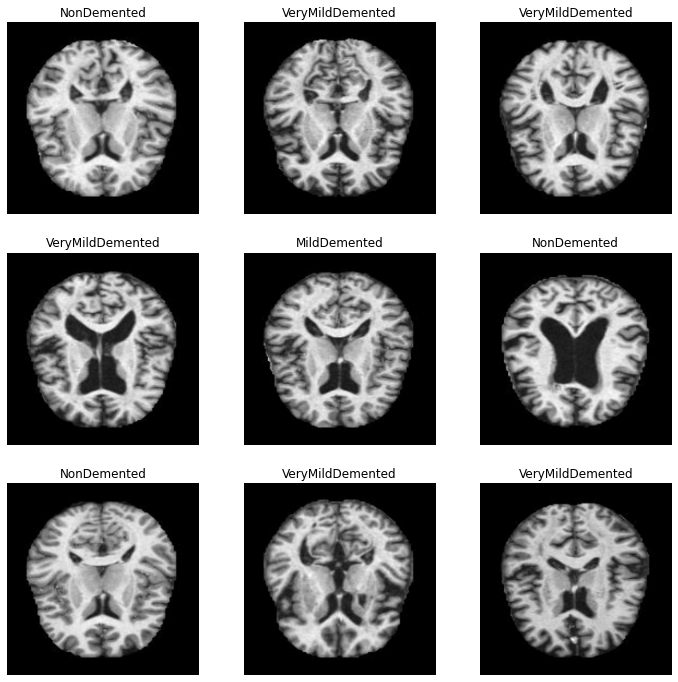

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# confirm image_batch and label shape

for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


## **Create the Initial Model:**

The model follows the standard architecture for image classification. For the first layer we standardize the images so that they fall in between a range of 0 and 1. Next we add three CNN layers with a relu activation and max pooling in between. Lastly we add fully connected layers to flatten the inputs.

In [ ]:
#create model
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
# get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

Here I defined a model checkpoint and earlystopping as learned in class, that would be applied while training the model.

In [ ]:
#define model checkpoint and earlystopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimers1.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# train the model for 30 epochs

history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
161/161 [==============================] - 145s 843ms/step - loss: 1.0281 - accuracy: 0.5269 - val_loss: 1.1064 - val_accuracy: 0.5004
Epoch 2/30
161/161 [==============================] - 3s 21ms/step - loss: 0.7175 - accuracy: 0.6911 - val_loss: 1.0378 - val_accuracy: 0.5629
Epoch 3/30
161/161 [==============================] - 3s 19ms/step - loss: 0.3715 - accuracy: 0.8563 - val_loss: 1.4270 - val_accuracy: 0.5489
Epoch 4/30
161/161 [==============================] - 3s 19ms/step - loss: 0.1555 - accuracy: 0.9410 - val_loss: 1.9467 - val_accuracy: 0.5536
Epoch 5/30
161/161 [==============================] - 3s 20ms/step - loss: 0.0704 - accuracy: 0.9756 - val_loss: 2.0748 - val_accuracy: 0.5817
Epoch 6/30
161/161 [==============================] - 3s 19ms/step - loss: 0.0137 - accuracy: 0.9973 - val_loss: 2.3492 - val_accuracy: 0.5989
Epoch 7/30
161/161 [==============================] - 3s 20ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.6576 - val_accuracy: 0.6

To visualize the model results we create a plot for the training and validation accuracy and another plot for the training and validation loss.

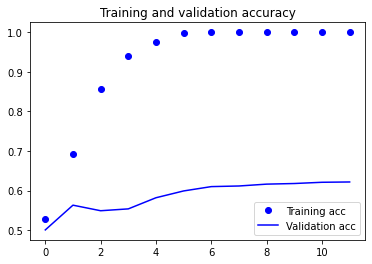

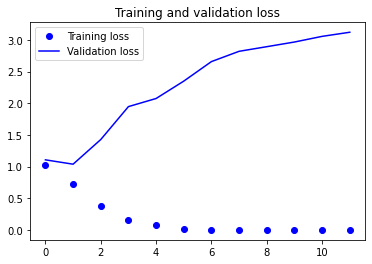

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After training the model the best achieved results for the training accuracy was 100% and validation accuracy 62%. The difference in the training and validation accuracy indicates that the model is overfitting and that we will need to make some improvements.

## **Changing the inputs for the model**

My first effort to improve the model was to increase the inputs for the CNN layers, which resulted in a decrease in the training accuracy from 100% to 98% and validation accuracy from 62% to 43%.

In [ ]:
#Create model
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
# Retrieve model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)      

In [ ]:
#compile model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#define model checkpoint and earlystopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimers2.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

In [ ]:
#train model with 30 epochs

history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
161/161 [==============================] - 6s 33ms/step - loss: 1.0871 - accuracy: 0.5263 - val_loss: 1.0761 - val_accuracy: 0.5074
Epoch 2/30
161/161 [==============================] - 5s 32ms/step - loss: 0.7811 - accuracy: 0.6583 - val_loss: 0.9512 - val_accuracy: 0.5919
Epoch 3/30
161/161 [==============================] - 4s 24ms/step - loss: 0.4479 - accuracy: 0.8178 - val_loss: 1.5968 - val_accuracy: 0.5176
Epoch 4/30
161/161 [==============================] - 4s 24ms/step - loss: 0.2501 - accuracy: 0.9039 - val_loss: 2.5123 - val_accuracy: 0.5426
Epoch 5/30
161/161 [==============================] - 4s 24ms/step - loss: 0.0780 - accuracy: 0.9738 - val_loss: 5.4716 - val_accuracy: 0.4691
Epoch 6/30
161/161 [==============================] - 4s 24ms/step - loss: 0.0696 - accuracy: 0.9732 - val_loss: 3.5608 - val_accuracy: 0.5551
Epoch 7/30
161/161 [==============================] - 4s 24ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 4.5305 - val_accuracy: 0.5442

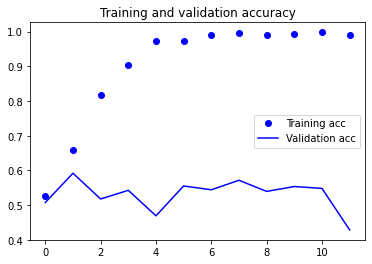

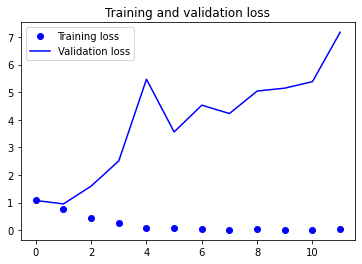

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Regularization:**

In my next attempt to improve the model I added an l1 regularizer to prevent overfitting. The results did not appear to change much and the training and validation accuracy decreased. The results for this model included a training accuracy of 99% and validation accuracy of 56%.

In [ ]:
from keras import regularizers

In [ ]:
# create model
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1(0.0001), activation='relu'))
model.add(layers.Dense(4))

In [ ]:
# get model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#define model checkpoint and earlystopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimers3_reg.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

In [ ]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
161/161 [==============================] - 4s 21ms/step - loss: 1.5375 - accuracy: 0.5188 - val_loss: 1.2595 - val_accuracy: 0.4934
Epoch 2/30
161/161 [==============================] - 3s 20ms/step - loss: 1.0376 - accuracy: 0.6016 - val_loss: 1.1122 - val_accuracy: 0.5575
Epoch 3/30
161/161 [==============================] - 3s 19ms/step - loss: 0.8699 - accuracy: 0.7073 - val_loss: 1.4148 - val_accuracy: 0.4918
Epoch 4/30
161/161 [==============================] - 3s 19ms/step - loss: 0.6673 - accuracy: 0.8162 - val_loss: 2.2195 - val_accuracy: 0.3839
Epoch 5/30
161/161 [==============================] - 3s 19ms/step - loss: 0.5056 - accuracy: 0.9020 - val_loss: 1.8902 - val_accuracy: 0.5184
Epoch 6/30
161/161 [==============================] - 3s 19ms/step - loss: 0.4001 - accuracy: 0.9541 - val_loss: 2.7271 - val_accuracy: 0.5371
Epoch 7/30
161/161 [==============================] - 3s 19ms/step - loss: 0.3439 - accuracy: 0.9701 - val_loss: 3.1492 - val_accuracy: 0.4894

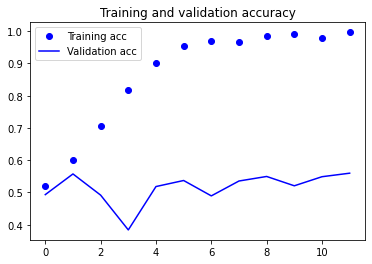

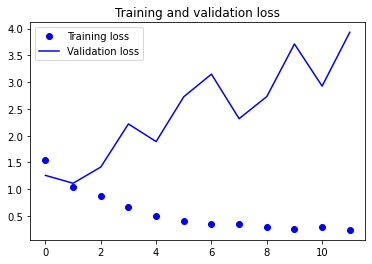

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Data Augmentation**

Due to the limited amount of training data I decided to use data augumentation to help generate additional data to prevent overfitting. After using the technique there were no improvements and the training accuracy decreased to 74% and the validation accuracy decreased to 50%.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ])


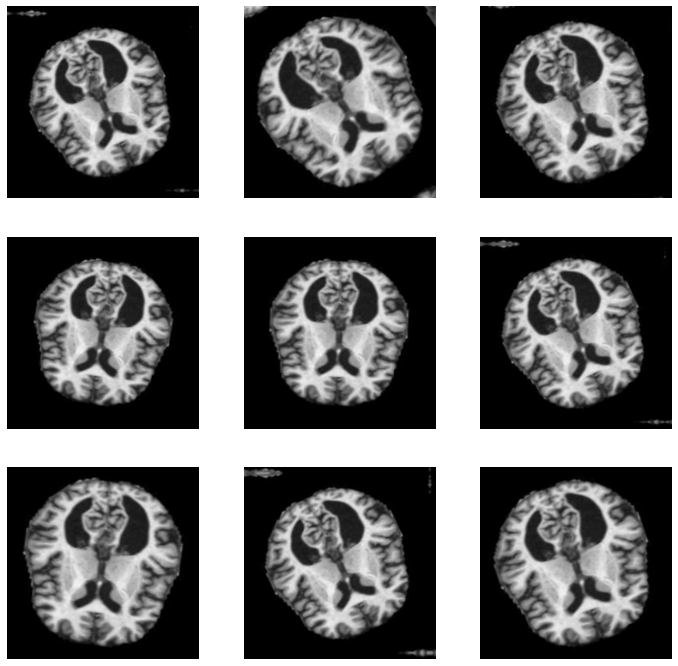

In [ ]:
plt.figure(figsize=(12, 12))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#define model checkpoint and earlystopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimers4_aug.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

In [ ]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
161/161 [==============================] - 7s 37ms/step - loss: 1.0335 - accuracy: 0.4907 - val_loss: 0.9939 - val_accuracy: 0.5027
Epoch 2/30
161/161 [==============================] - 6s 35ms/step - loss: 0.9570 - accuracy: 0.5419 - val_loss: 1.2089 - val_accuracy: 0.5020
Epoch 3/30
161/161 [==============================] - 6s 36ms/step - loss: 0.9211 - accuracy: 0.5559 - val_loss: 0.9252 - val_accuracy: 0.5700
Epoch 4/30
161/161 [==============================] - 6s 36ms/step - loss: 0.9039 - accuracy: 0.5747 - val_loss: 0.9206 - val_accuracy: 0.5614
Epoch 5/30
161/161 [==============================] - 6s 36ms/step - loss: 0.8847 - accuracy: 0.5737 - val_loss: 0.9170 - val_accuracy: 0.5567
Epoch 6/30
161/161 [==============================] - 6s 36ms/step - loss: 0.8750 - accuracy: 0.5860 - val_loss: 0.9079 - val_accuracy: 0.5598
Epoch 7/30
161/161 [==============================] - 6s 35ms/step - loss: 0.8583 - accuracy: 0.5854 - val_loss: 0.9346 - val_accuracy: 0.5590

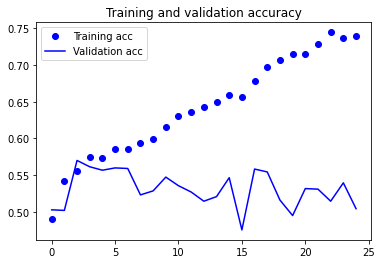

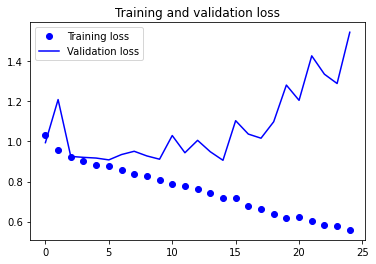

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Adding a Dropout Layer:**

After adding a dropout layer to prevent overfitting I noticed a slight improvement in the model. The training accuracy remained around 100% while the validation accuracy increased to about 64%. As a result, I used this model to make predictions.

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#define model checkpoint and earlystopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimers5_dropout.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

In [ ]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
161/161 [==============================] - 4s 21ms/step - loss: 0.9840 - accuracy: 0.5351 - val_loss: 0.9125 - val_accuracy: 0.5637
Epoch 2/30
161/161 [==============================] - 3s 19ms/step - loss: 0.6961 - accuracy: 0.6952 - val_loss: 1.1364 - val_accuracy: 0.5676
Epoch 3/30
161/161 [==============================] - 3s 19ms/step - loss: 0.3313 - accuracy: 0.8666 - val_loss: 1.2780 - val_accuracy: 0.5465
Epoch 4/30
161/161 [==============================] - 3s 19ms/step - loss: 0.1540 - accuracy: 0.9430 - val_loss: 1.8188 - val_accuracy: 0.5731
Epoch 5/30
161/161 [==============================] - 3s 19ms/step - loss: 0.1617 - accuracy: 0.9449 - val_loss: 1.4361 - val_accuracy: 0.6427
Epoch 6/30
161/161 [==============================] - 3s 20ms/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 1.6031 - val_accuracy: 0.6380
Epoch 7/30
161/161 [==============================] - 3s 19ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 1.6955 - val_accuracy: 0.6583

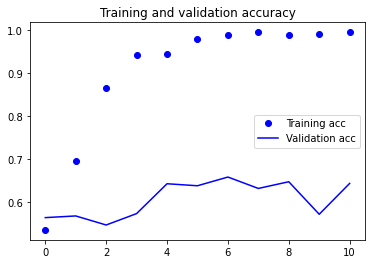

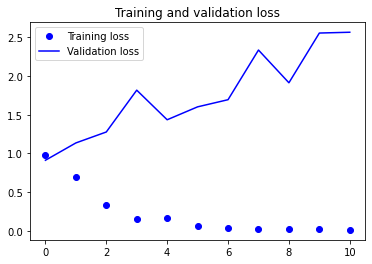

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Making Predictions:**

In order to make predictions I found a random NonDemented MRI brain scan online not related to the train or validation dataset and used the dropout model created above to make the prediction, which was accurate. The percent confidence after making the prediction was 84%.

In [ ]:
mri_img = '/content/test_mri_image.jpeg'
img = tf.keras.utils.load_img(mri_img, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 104ms/step
This image most likely belongs to NonDemented with a 83.52 percent confidence.


## **Transfer Learning:**

Out of curiosity I decided to experiment with using the pretrained VGG16 model. The results after running the model was 79% for the training accuracy and 56% for the validation accuracy, which was not better than my initial model but could be a good starting point.

In [ ]:
# create train/test data for alzheimer's dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               6422784   
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#define model checkpoint and earlystopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimers5_vgg16.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

In [ ]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
161/161 [==============================] - 16s 83ms/step - loss: 5.2545 - accuracy: 0.4862 - val_loss: 1.0343 - val_accuracy: 0.5020
Epoch 2/30
161/161 [==============================] - 12s 73ms/step - loss: 1.0430 - accuracy: 0.4958 - val_loss: 1.0682 - val_accuracy: 0.5004
Epoch 3/30
161/161 [==============================] - 13s 77ms/step - loss: 1.0416 - accuracy: 0.4962 - val_loss: 1.0182 - val_accuracy: 0.5137
Epoch 4/30
161/161 [==============================] - 12s 73ms/step - loss: 1.0149 - accuracy: 0.5093 - val_loss: 1.0450 - val_accuracy: 0.4433
Epoch 5/30
161/161 [==============================] - 12s 74ms/step - loss: 1.2812 - accuracy: 0.5183 - val_loss: 1.0464 - val_accuracy: 0.5004
Epoch 6/30
161/161 [==============================] - 12s 73ms/step - loss: 1.0793 - accuracy: 0.4933 - val_loss: 1.0332 - val_accuracy: 0.5012
Epoch 7/30
161/161 [==============================] - 12s 77ms/step - loss: 0.9988 - accuracy: 0.5276 - val_loss: 1.0038 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
!jupyter nbconvert --to html MedicineCaseStudy_OGarroFelicia.ipynb

[NbConvertApp] Converting notebook MedicineCaseStudy_OGarroFelicia.ipynb to html
[NbConvertApp] Writing 1172761 bytes to MedicineCaseStudy_OGarroFelicia.html
